# **Diabetes Prediction using Logistic Regression with SMOTE and Principal Component Analysis (PCA)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading dataset
df = pd.read_csv("diabetes_early.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
# Getting general information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## **EDA**

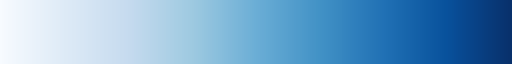

In [7]:
sns.color_palette("Blues", as_cmap=True)

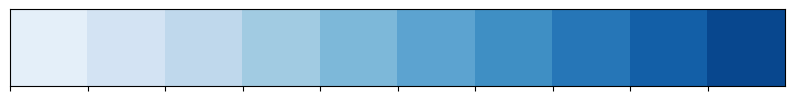

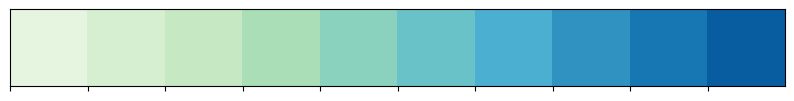

In [8]:
GnBu_palette = sns.color_palette("GnBu",10)
Blues_palette = sns.color_palette("Blues",10)
sns.palplot(Blues_palette)
sns.palplot(GnBu_palette)

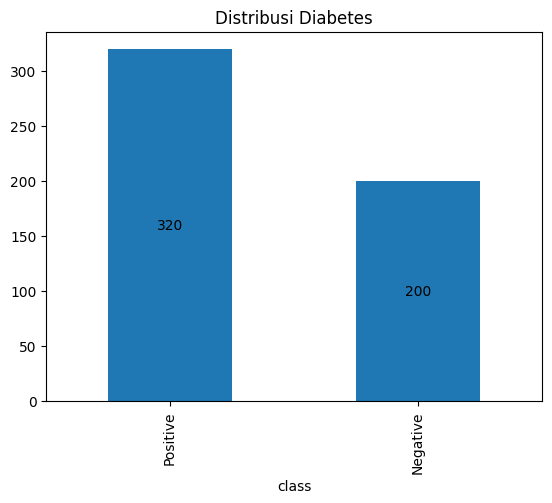

In [9]:
#Evaluating target variable distribution
fig, ax = plt.subplots()
df['class'].value_counts().plot(kind='bar')
ax.set_title('Distribusi Diabetes')
ax.bar_label(ax.containers[0], label_type='center')

plt.show()

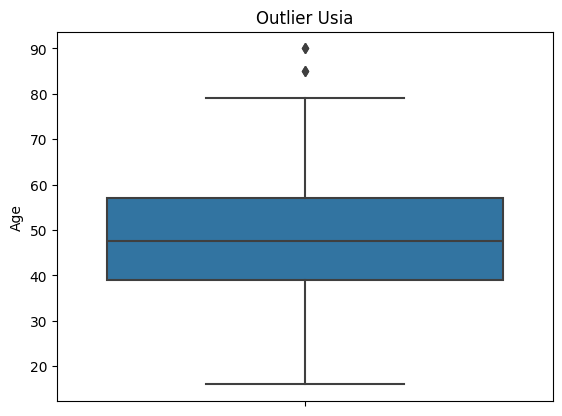

In [10]:
sns.boxplot(y=df['Age'])
plt.title('Outlier Usia')
plt.show()

## **Data Cleaning & Data Processing**

### Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# List kolom yang akan di-encode (semua kecuali 'Age')
columns_to_encode = df.columns[df.columns != 'Age']

# Mengkodekan variabel kategori ke bentuk numerik menggunakan LabelEncoder
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### Feature Engineering

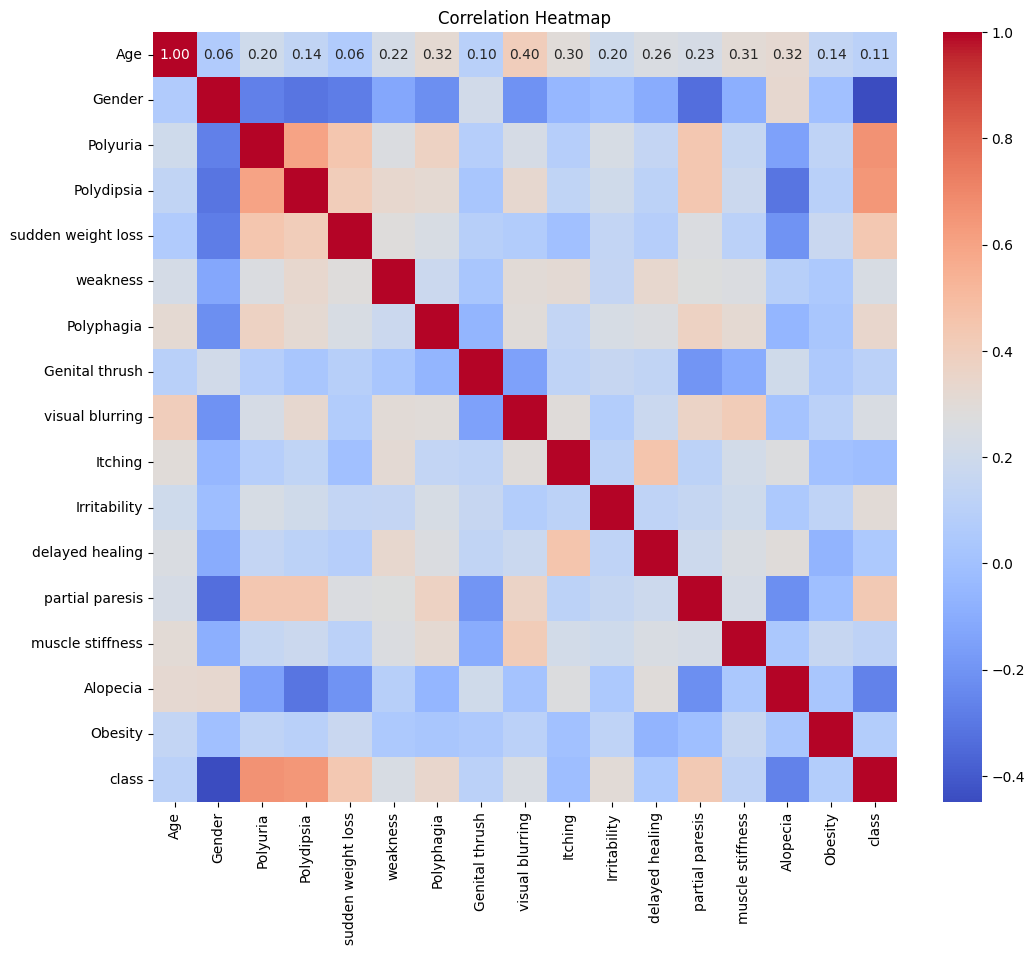

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
max_value = df['Age'].max()
min_value = df['Age'].min()

print(f"Range atas untuk kolom Age: {max_value}")
print(f"Range bawah untuk kolom Age: {min_value}")

Range atas untuk kolom Age: 90
Range bawah untuk kolom Age: 16


In [15]:
df.loc[(df['Age'] >= 16) & (df['Age'] <= 25), 'Age_Category'] = 1
df.loc[(df['Age'] > 25) & (df['Age'] <= 35), 'Age_Category'] = 2
df.loc[(df['Age'] > 35) & (df['Age'] <= 45), 'Age_Category'] = 3
df.loc[(df['Age'] > 45) & (df['Age'] <= 55), 'Age_Category'] = 4
df.loc[(df['Age'] > 55) & (df['Age'] <= 65), 'Age_Category'] = 5
df.loc[(df['Age'] > 65) & (df['Age'] <= 75), 'Age_Category'] = 6
df.loc[(df['Age'] > 75) & (df['Age'] <= 85), 'Age_Category'] = 7
df.loc[df['Age'] > 85, 'Age_Category'] = 8

df.drop(['Age'],axis = 1, inplace = True)

# 'Polyuria' dan 'Polydipsia' merupakan dua variabel yang berkorelasi tinggi
df['PolyInteraction'] = df['Polyuria'] * df['Polydipsia']

In [16]:
df

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Category,PolyInteraction
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,3.0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,5.0,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,3.0,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,3.0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,3.0,1
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,4.0,1
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,5.0,1
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,2.0,0


### Missing Value

In [17]:
# Before solving this problem, let's check the null values.
df.isnull().sum()

Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
Age_Category          0
PolyInteraction       0
dtype: int64

### Outliers

In [18]:
df.shape

(520, 18)

<Axes: >

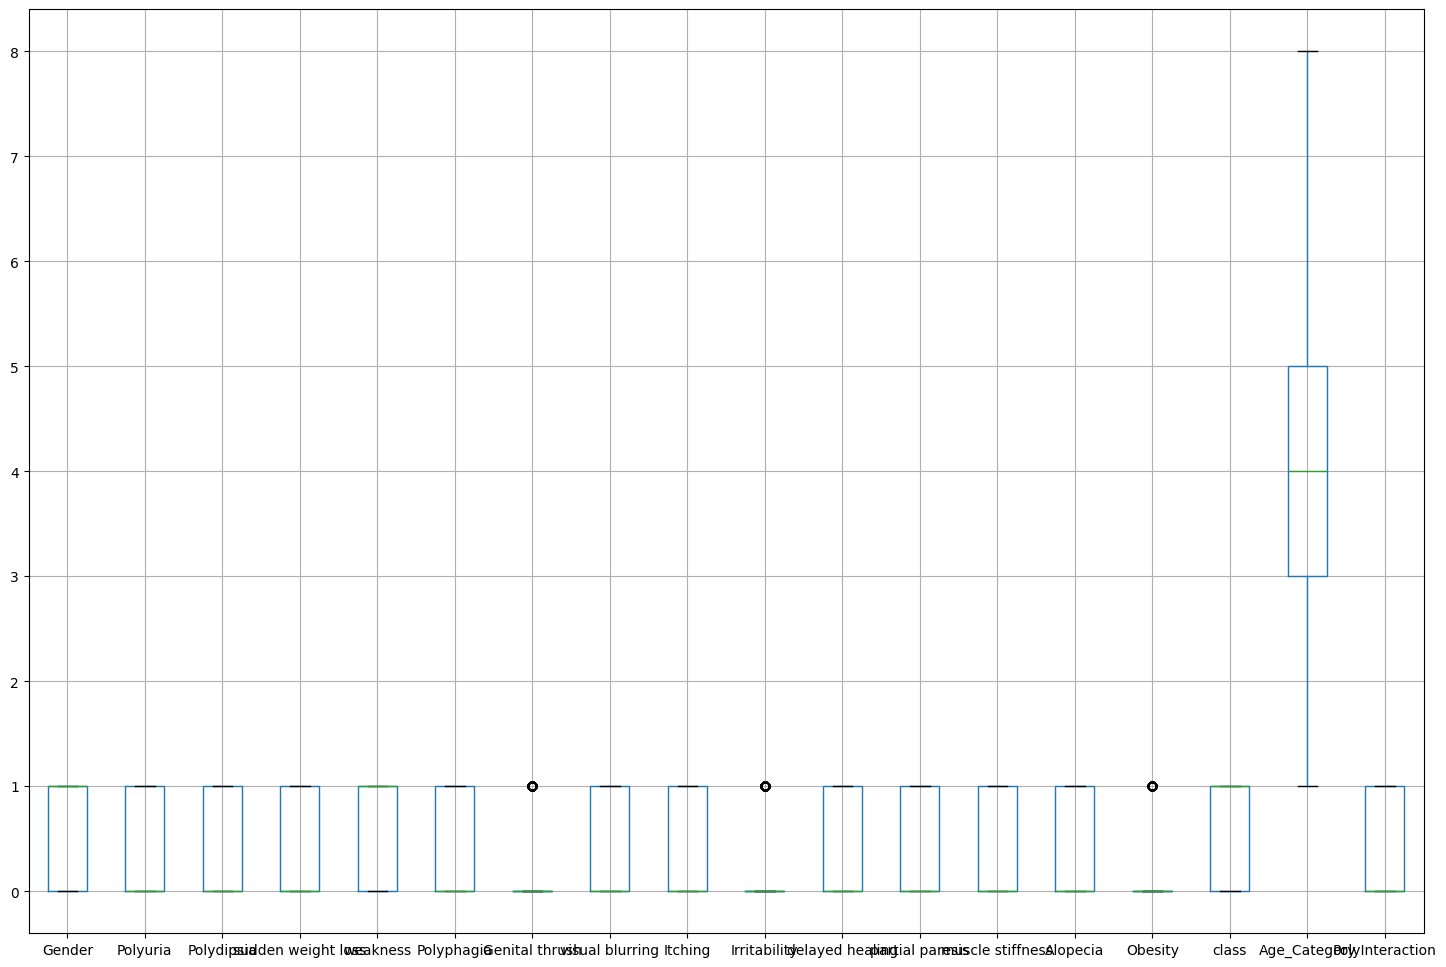

In [19]:
#checking outliers with the help of boxplot

df.boxplot(figsize = (18,12))

In [20]:
# import numpy as np

# # Kolom 'Age' adalah satu-satunya kolom yang ingin diatasi outlier
# column_to_process = 'Age'

# # Mengatasi outlier pada kolom 'Age' menggunakan metode IQR
# Q1 = df[column_to_process].quantile(0.25)
# Q3 = df[column_to_process].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Mengganti nilai outlier dengan nilai batas atas atau batas bawah
# df[column_to_process] = np.where((df[column_to_process] < lower_bound) | (df[column_to_process] > upper_bound), df[column_to_process].median(), df[column_to_process])

In [21]:
# #checking outliers now

# df.boxplot(figsize = (18,12))

In [22]:
# df.shape

### Data Splitting

In [23]:
X = df.drop(["class"],axis=1)
y = df["class"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(f'Total seluruh dataset: {len(df)}')
print(f'Traning dataset: {len(X_train)}')
print(f'Traning dataset: {len(y_train)}')
print(f'Testing dataset: {len(X_test)}')
print(f'Testing dataset: {len(y_test)}')

Total seluruh dataset: 520
Traning dataset: 416
Traning dataset: 416
Testing dataset: 104
Testing dataset: 104


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

# Define the logistic regression model
logreg_diab = LogisticRegression(random_state=42)

# Specify the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation on X_train and y_train
logres_cv = cross_val_score(logreg_diab, X_train, y_train, cv=kf, scoring='accuracy')

# Print accuracy for each fold in training set
for fold, accuracy in enumerate(logres_cv, 1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print average accuracy across all folds
average_accuracy = np.mean(logres_cv)
print(f'\nAverage Accuracy Across {num_folds}-Fold Cross-Validation: {average_accuracy:.4f}')

Fold 1: Accuracy = 0.9286
Fold 2: Accuracy = 0.8571
Fold 3: Accuracy = 0.9286
Fold 4: Accuracy = 0.9048
Fold 5: Accuracy = 0.8810
Fold 6: Accuracy = 0.9762
Fold 7: Accuracy = 0.9024
Fold 8: Accuracy = 0.9756
Fold 9: Accuracy = 0.9512
Fold 10: Accuracy = 0.9024

Average Accuracy Across 10-Fold Cross-Validation: 0.9208


In [27]:
#fitting data in Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy_before = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy_before)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


Accuracy: 0.9230769230769231


### SMOTE (Handling Imbalanced Data)

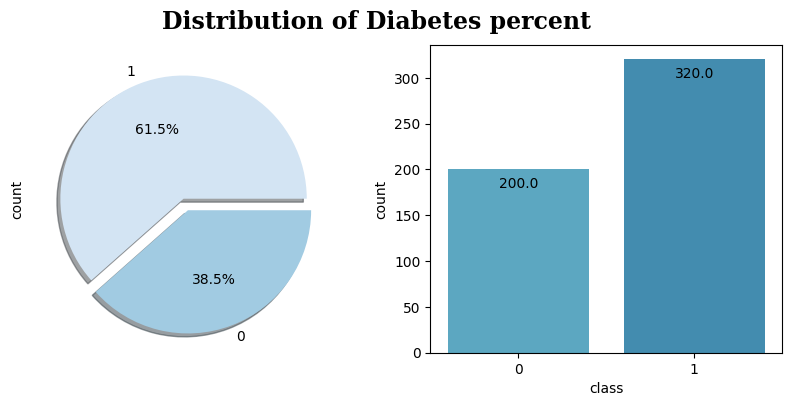

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


df['class'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=axes[0], shadow=True, colors=[Blues_palette[1], Blues_palette[3]]
)

sns.countplot(x='class', data=df, palette=[GnBu_palette[6], GnBu_palette[7]], ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, -10), textcoords='offset points')

axes[1].patch.set_alpha(0)

fig.text(0.28, 0.92, "Distribution of Diabetes percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

In [31]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_train, y_train  = sm.fit_resample(X_train, y_train)

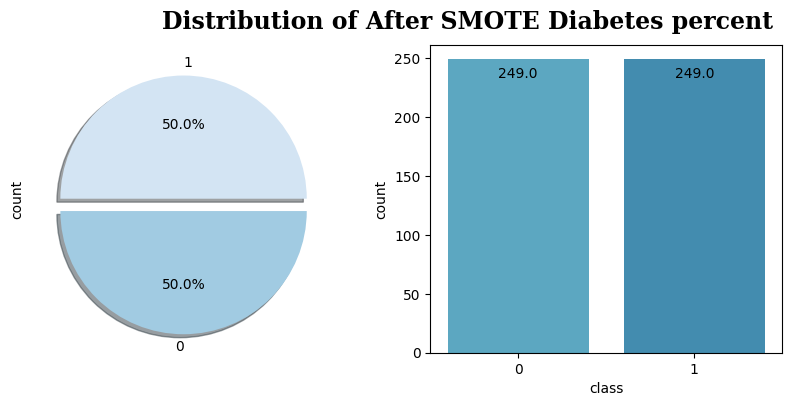

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().plot.pie(
    explode=[0,0.1], autopct='%1.1f%%', ax=axes[0], shadow=True, colors=[Blues_palette[1], Blues_palette[3]]
)

sns.countplot(x=y_train, data=df, palette=[GnBu_palette[6], GnBu_palette[7]], ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, -10), textcoords='offset points')
axes[1].patch.set_alpha(0)

fig.text(0.28, 0.92,"Distribution of After SMOTE Diabetes percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

### Dimensionality Reduction using PCA

In [33]:
X_train.corrwith(y_train)

Gender               -0.453798
Polyuria              0.704879
Polydipsia            0.698867
sudden weight loss    0.511162
weakness              0.250473
Polyphagia            0.321881
Genital thrush        0.143774
visual blurring       0.275523
Itching              -0.004017
Irritability          0.332914
delayed healing       0.036262
partial paresis       0.449314
muscle stiffness      0.138801
Alopecia             -0.263537
Obesity               0.097635
Age_Category          0.113433
PolyInteraction       0.656532
dtype: float64

<Axes: title={'center': 'Correlation with Diabetes'}>

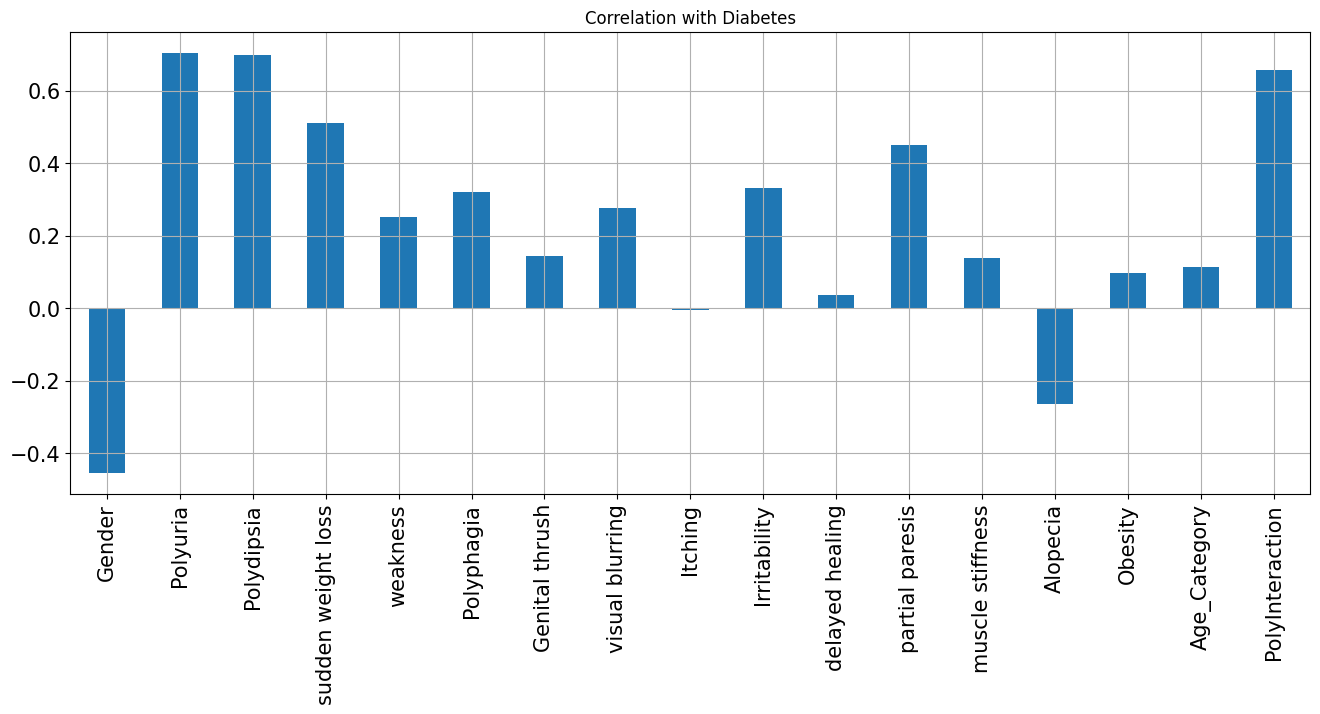

In [34]:
#Correlation with Response Variable class

X_train.corrwith(y_train).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

In [35]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
#decreasing 17 features to 14 features

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [37]:
# Ambil komponen utama
components = pca.components_

# Membuat dataframe untuk memudahkan visualisasi
loadings_df = pd.DataFrame(components, columns=X_train.columns)

# Tampilkan dataframe
print("Nilai Beban (Loadings) untuk Setiap Fitur:")
print(loadings_df)

Nilai Beban (Loadings) untuk Setiap Fitur:
      Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0  -0.196749  0.347623    0.353493            0.249827  0.251855    0.281419   
1   0.183068 -0.194157   -0.255802           -0.200603  0.173185    0.084474   
2   0.229590  0.186796    0.099318            0.221741  0.060022   -0.101682   
3   0.239821 -0.002907   -0.109210           -0.030859 -0.304702    0.234790   
4  -0.325877 -0.154641   -0.020949            0.201023  0.263530   -0.391769   
5   0.416331  0.166998    0.265573           -0.350969 -0.020931   -0.286862   
6  -0.472348  0.135141   -0.052194           -0.015467 -0.624421    0.228231   
7  -0.319793 -0.023093    0.083637           -0.568174 -0.116956   -0.248952   
8   0.076317 -0.154834    0.126489           -0.113656 -0.061846    0.094071   
9  -0.280807 -0.134384   -0.019562            0.289664  0.133167   -0.281191   
10  0.093814 -0.177611   -0.125925            0.060546 -0.025837   -0.178642 

In [38]:
# Ambil indeks fitur dengan nilai beban terbesar pada setiap komponen utama
most_important_features = [np.abs(components[i]).argmax() for i in range(components.shape[0])]

# Ambil nama fitur yang terkait dengan indeks tersebut
selected_features = X_train.columns[most_important_features]

# Tampilkan fitur yang digunakan
print("Fitur yang Digunakan Setelah PCA:")
print(selected_features)

Fitur yang Digunakan Setelah PCA:
Index(['Polydipsia', 'Alopecia', 'Genital thrush', 'Obesity', 'Obesity',
       'Gender', 'weakness', 'Irritability', 'muscle stiffness',
       'Age_Category', 'partial paresis', 'Polyphagia', 'Itching',
       'visual blurring'],
      dtype='object')


## **MODEL**

### Logistic Regression + SMOTE + PCA

In [39]:
from sklearn.model_selection import cross_val_score, KFold

# Define the logistic regression model
logreg_diab = LogisticRegression(random_state=42)

# Specify the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation on X_train and y_train
logres_cv = cross_val_score(logreg_diab, X_train_pca, y_train, cv=kf, scoring='accuracy')

# Print accuracy for each fold in training set
for fold, accuracy in enumerate(logres_cv, 1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print average accuracy across all folds
average_accuracy = np.mean(logres_cv)
print(f'\nAverage Accuracy Across {num_folds}-Fold Cross-Validation: {average_accuracy:.4f}')

Fold 1: Accuracy = 0.9200
Fold 2: Accuracy = 0.9600
Fold 3: Accuracy = 0.9200
Fold 4: Accuracy = 0.9400
Fold 5: Accuracy = 0.9200
Fold 6: Accuracy = 0.9200
Fold 7: Accuracy = 0.8600
Fold 8: Accuracy = 0.9800
Fold 9: Accuracy = 0.9592
Fold 10: Accuracy = 0.8980

Average Accuracy Across 10-Fold Cross-Validation: 0.9277


In [40]:
# Model using data testing
logreg_diab = LogisticRegression(random_state=42)
logreg_diab.fit(X_train_pca, y_train)
y_pred = logreg_diab.predict(X_test_pca)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy_after = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy_after)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.97      0.96      0.96        71

    accuracy                           0.95       104
   macro avg       0.94      0.95      0.94       104
weighted avg       0.95      0.95      0.95       104


Accuracy: 0.9519230769230769


In [41]:
pickle.dump(logreg_diab, open("model.pkl", "wb"))

## **PERBANDINGAN**

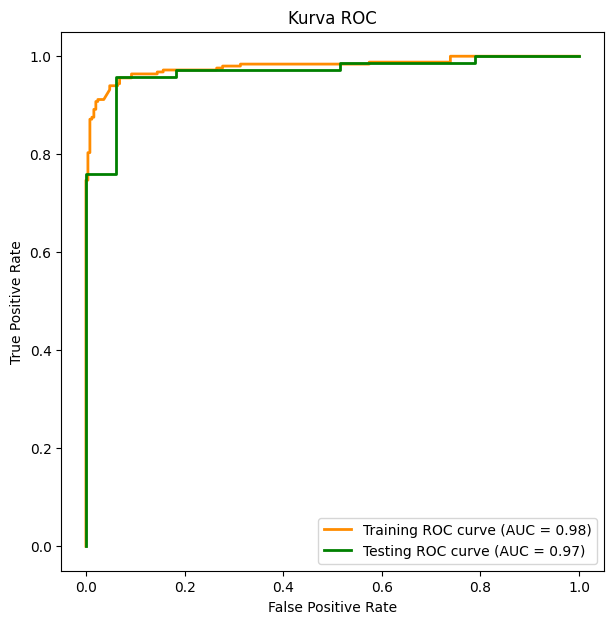

In [42]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_train_prob = logreg_diab.predict_proba(X_train_pca)[:, 1]
y_test_prob = logreg_diab.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Testing ROC curve (AUC = {:.2f})'.format(roc_auc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc='lower right')
plt.show()

# PERBANDINGAN

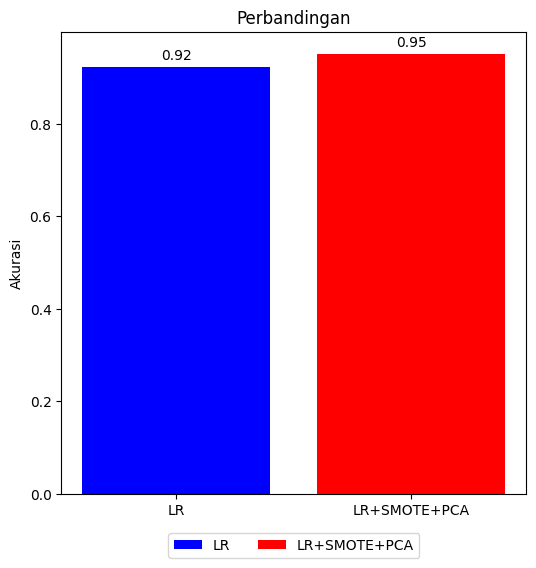

In [43]:
fig, ax = plt.subplots(figsize=(6, 6))
dataFrame = ['LR', 'LR+SMOTE+PCA']
akurasi = [accuracy_before, accuracy_after]

bars = ax.bar(dataFrame, akurasi, label=dataFrame, color=['blue', 'red'])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

ax.set_ylabel('Akurasi')
ax.set_title('Perbandingan')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=2)

plt.show()

# Sistem dengan Data Baru

In [44]:
# Melakukan prediksi terhadap data baru
new_data = {
    'Age': [55],
    'Gender': [1],
    'Polyuria': [1],
    'Polydipsia': [1],
    'sudden weight loss': [0],
    'weakness': [1],
    'Polyphagia': [1],
    'Genital thrush': [0],
    'visual blurring': [1],
    'Itching': [1],
    'Irritability': [0],
    'delayed healing': [1],
    'partial paresis': [0],
    'muscle stiffness': [1],
    'Alopecia': [1],
    'Obesity': [1]
}

In [45]:
# Menyesuaikan data baru dengan feature engineering yang telah diterapkan pada data training
new_data['Age_Category'] = 0
if (new_data['Age'][0] >= 16) & (new_data['Age'][0] <= 25):
    new_data['Age_Category'] = 1
elif (new_data['Age'][0] > 25) & (new_data['Age'][0] <= 35):
    new_data['Age_Category'] = 2
elif (new_data['Age'][0] > 35) & (new_data['Age'][0] <= 45):
    new_data['Age_Category'] = 3
elif (new_data['Age'][0] > 45) & (new_data['Age'][0] <= 55):
    new_data['Age_Category'] = 4
elif (new_data['Age'][0] > 55) & (new_data['Age'][0] <= 65):
    new_data['Age_Category'] = 5
elif (new_data['Age'][0] > 65) & (new_data['Age'][0] <= 75):
    new_data['Age_Category'] = 6
elif (new_data['Age'][0] > 75) & (new_data['Age'][0] <= 85):
    new_data['Age_Category'] = 7
elif new_data['Age'][0] > 85:
    new_data['Age_Category'] = 8

new_data.pop('Age')
new_data['PolyInteraction'] = new_data['Polyuria'][0] * new_data['Polydipsia'][0]

In [46]:
new_data

{'Gender': [1],
 'Polyuria': [1],
 'Polydipsia': [1],
 'sudden weight loss': [0],
 'weakness': [1],
 'Polyphagia': [1],
 'Genital thrush': [0],
 'visual blurring': [1],
 'Itching': [1],
 'Irritability': [0],
 'delayed healing': [1],
 'partial paresis': [0],
 'muscle stiffness': [1],
 'Alopecia': [1],
 'Obesity': [1],
 'Age_Category': 4,
 'PolyInteraction': 1}

In [47]:
# Konversi ke DataFrame
new_data_df = pd.DataFrame(new_data)

# Pilih hanya kolom numerik untuk transformasi
numeric_columns = new_data_df.select_dtypes(include=[np.number]).columns
new_data_numeric = new_data_df[numeric_columns]

# Menerapkan transformasi PCA pada data baru
new_data_std = scaler.transform(new_data_numeric)
new_data_pca = pca.transform(new_data_std)

In [48]:
# Prediksi terhadap data baru
prediction = logreg_diab.predict(new_data_pca)
predicted_class = prediction[0]
predicted_class_original = label_encoder.inverse_transform([predicted_class])[0]
print(f'Hasil Prediksi Diabetes: {predicted_class_original}')

Hasil Prediksi Diabetes: Positive
